In [3]:
import joblib

In [19]:
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [5]:
# Load the saved train and test splits
X_train = joblib.load('X_train.pkl')
y_train = joblib.load('y_train.pkl')
X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')

In [11]:
rf_model = joblib.load('rf_model.joblib')
svm_model = joblib.load('svm_model.joblib')

In [13]:
rf_pca_model = joblib.load('rf_pca_model.joblib')
svm_pca_model = joblib.load('svc_pca_model.joblib')

In [15]:
isomap_rf_model = joblib.load('rf_isomap_best_model.pkl')
isomap_svm_model = joblib.load('svc_isomap_best_model.pkl')

In [57]:
# Flatten test data
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Predict and evaluate Random Forest
start_time = time.time()
rf_test_preds = rf_model.predict(X_test_flat)
rf_training_time = time.time() - start_time

print(f"RF - Prediction Time: {rf_training_time:.2f} seconds")
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_preds))
print("Random Forest Test F1 Score:", f1_score(y_test, rf_test_preds))

# Predict and evaluate SVM
start_time = time.time()
svm_test_preds = svm_model.predict(X_test_flat)
svc_training_time = time.time() - start_time

print(f"SVM - Prediction Time: {svc_training_time:.2f} seconds")
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print("SVM Test F1 Score:", f1_score(y_test, svm_test_preds))

RF - Prediction Time: 0.13 seconds
Random Forest Test Accuracy: 0.95375
Random Forest Test F1 Score: 0.9038961038961039
SVM - Prediction Time: 8.82 seconds
SVM Test Accuracy: 0.96875
SVM Test F1 Score: 0.9363867684478372


In [47]:
# Evaluation on test set
start_time = time.time()
y_pred_svc_pca = svm_pca_model.predict(X_test)
svc_pca_training_time = time.time() - start_time
svc_pca_accuracy = accuracy_score(y_test, y_pred_svc_pca)
svc_pca_f1 = f1_score(y_test, y_pred_svc_pca)

print(f"SVM with PCA - Prediction Time: {svc_pca_training_time:.2f} seconds")
print(f"SVC with PCA - Accuracy: {svc_pca_accuracy:.4f}")
print(f"SVC with PCA - F1 Score: {svc_pca_f1:.4f}\n")

SVM with PCA - Prediction Time: 2.42 seconds
SVC with PCA - Accuracy: 0.9688
SVC with PCA - F1 Score: 0.9364



In [51]:
# Test set evaluation
start_time = time.time()
y_pred_rf_pca = rf_pca_model.predict(X_test)
rf_pca_training_time = time.time() - start_time
rf_pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)
rf_pca_f1 = f1_score(y_test, y_pred_rf_pca)

print(f"RF with PCA - Prediction Time: {rf_pca_training_time:.2f} seconds")
print(f"Random Forest with PCA - Accuracy: {rf_pca_accuracy:.4f}")
print(f"Random Forest with PCA - F1 Score: {rf_pca_f1:.4f}")

RF with PCA - Prediction Time: 0.28 seconds
Random Forest with PCA - Accuracy: 0.9587
Random Forest with PCA - F1 Score: 0.9101


In [53]:
isomap = Isomap(n_components=3)
X_test_isomap = isomap.fit_transform(X_test)

# Test performance
start_time = time.time()
y_pred_svc = isomap_svm_model.predict(X_test_isomap)
svc_isomap_training_time = time.time() - start_time
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)

print(f"SVM with ISOMAP - Prediction Time: {svc_isomap_training_time:.2f} seconds")
print(f"SVC with ISOMAP testing - Accuracy: {svc_accuracy:.4f}")
print(f"SVC with ISOMAP testing - F1 Score: {svc_f1:.4f}\n")

SVM with ISOMAP - Prediction Time: 0.03 seconds
SVC with ISOMAP testing - Accuracy: 0.8337
SVC with ISOMAP testing - F1 Score: 0.6434



In [55]:
# Test performance
start_time = time.time()
y_pred_rf = isomap_rf_model.predict(X_test)
rf_isomap_training_time = time.time() - start_time
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"RF with ISOMAP - Prediction Time: {rf_isomap_training_time:.2f} seconds")
print(f"Random Forest with ISOMAP - Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest with ISOMAP - F1 Score: {rf_f1:.4f}\n")

RF with ISOMAP - Prediction Time: 0.87 seconds
Random Forest with ISOMAP - Accuracy: 0.8825
Random Forest with ISOMAP - F1 Score: 0.7403



In [39]:
import cv2
import os

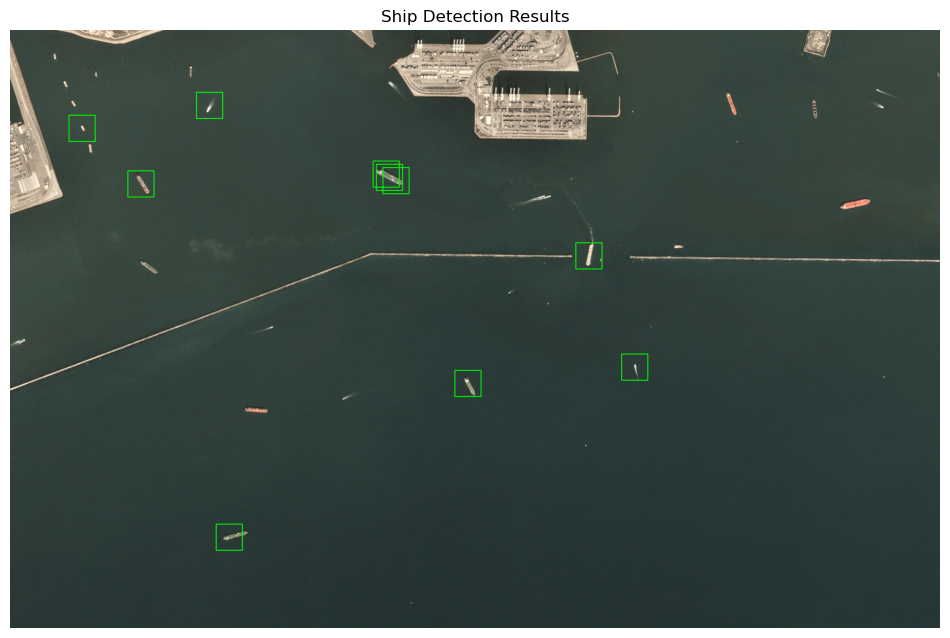

In [43]:
def sliding_window_predictions(scene_image, model_pipeline, window_size=(80, 80), step_size=10):
    detections = []
    
    # Preprocessing
    height, width = scene_image.shape[:2]
    resized_image = cv2.resize(scene_image, (width, height))
    
    for y in range(0, resized_image.shape[0] - window_size[0] + 1, step_size):
        for x in range(0, resized_image.shape[1] - window_size[1] + 1, step_size):
            # Extract window
            window = resized_image[y:y + window_size[0], x:x + window_size[1]]
            
            # Flatten the window
            window_flat = window.reshape(1, -1)
            
            # Predict using the pipeline
            prediction = model_pipeline.predict(window_flat)
            
            if prediction == 1:  
                detections.append((x, y, window_size[0], window_size[1]))
    
    # Annotatation
    for (x, y, w, h) in detections:
        cv2.rectangle(scene_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(scene_image, cv2.COLOR_BGR2RGB))
    plt.title("Ship Detection Results")
    plt.axis("off")
    plt.show()
    
    return detections

# application
scene_image = cv2.imread("ships_dataset/scenes/lb_2.png")  
detections = sliding_window_predictions(scene_image, svm_pca_model) 